In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

In [60]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Using the yfinance Library to Extract Stock Data


In [4]:
apple = yf.Ticker("AAPL")

In [6]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [32]:
apple.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098943,0.099373,0.098943,0.098943,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094211,0.094211,0.093781,0.093781,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087328,0.087328,0.086898,0.086898,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089049,0.089479,0.089049,0.089049,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091630,0.092061,0.091630,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-27 00:00:00-04:00,226.000000,228.850006,224.889999,228.029999,35934600,0.0,0.0
2024-08-28 00:00:00-04:00,227.919998,229.860001,225.679993,226.490005,38052200,0.0,0.0
2024-08-29 00:00:00-04:00,230.100006,232.919998,228.880005,229.789993,51906300,0.0,0.0


In [50]:
import requests
import json

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
response = requests.get(url)

if response.status_code == 200:
    json_data = response.json()
    
    with open("apple.json", "w") as file:
        json.dump(json_data, file, indent=4) 
    
    print("File downloaded and saved as JSON successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded and saved as JSON successfully.


In [54]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [55]:
apple_info['country']

'United States'

### Extracting Share Price


In [56]:
apple_share_price_data = apple.history(period="max")

In [57]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098943,0.099373,0.098943,0.098943,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094211,0.094211,0.093781,0.093781,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087328,0.087328,0.086898,0.086898,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089049,0.089479,0.089049,0.089049,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091630,0.092061,0.091630,0.091630,73449600,0.0,0.0


In [62]:
apple_share_price_data.reset_index()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.098943,0.099373,0.098943,0.098943,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094211,0.094211,0.093781,0.093781,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087328,0.087328,0.086898,0.086898,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089049,0.089479,0.089049,0.089049,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091630,0.092061,0.091630,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
11017,2024-08-27 00:00:00-04:00,226.000000,228.850006,224.889999,228.029999,35934600,0.0,0.0
11018,2024-08-28 00:00:00-04:00,227.919998,229.860001,225.679993,226.490005,38052200,0.0,0.0
11019,2024-08-29 00:00:00-04:00,230.100006,232.919998,228.880005,229.789993,51906300,0.0,0.0
11020,2024-08-30 00:00:00-04:00,230.190002,230.399994,227.479996,229.000000,52990800,0.0,0.0


TypeError: plot() got an unexpected keyword argument 'x'

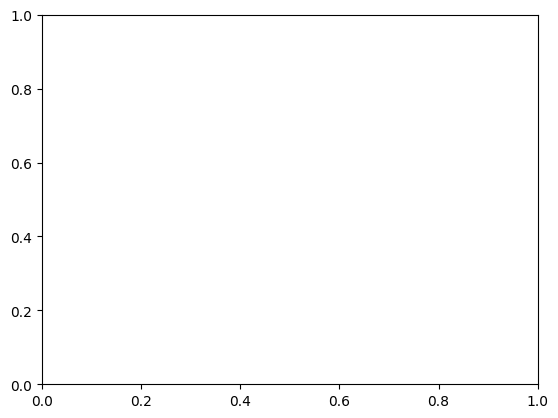

In [63]:
plt.plot(x=apple_share_price_data["Date"],y=apple_share_price_data["Open"])